## Data Importing and Preprocessing

In [1]:
pwd

'D:\\ML_codes\\House_Price'

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/ML_codes/House_Price/House_Price.csv', header = 0)

In [4]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [5]:
df.shape

(506, 19)

In [6]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


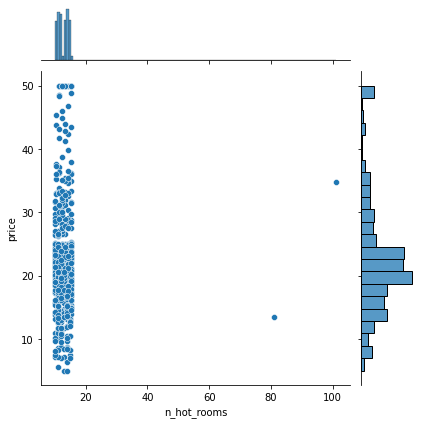

In [7]:
sns.jointplot(x = 'n_hot_rooms', y = 'price', data = df)
plt.show()

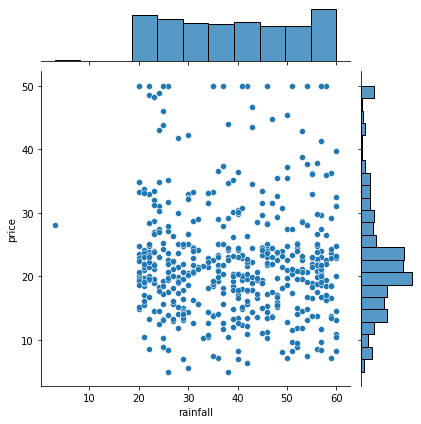

In [8]:
sns.jointplot(x = 'rainfall', y = 'price', data = df)
plt.show()

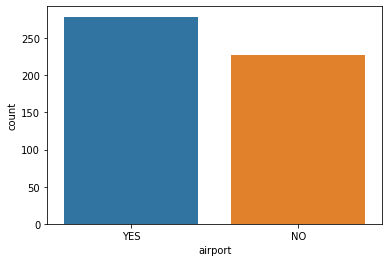

In [9]:
sns.countplot(x = 'airport', data = df)
plt.show()

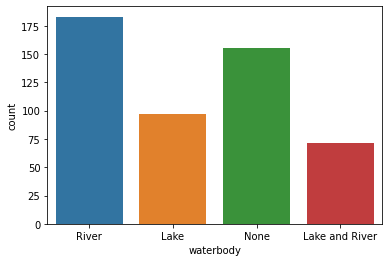

In [10]:
sns.countplot(x = 'waterbody', data = df)
plt.show()

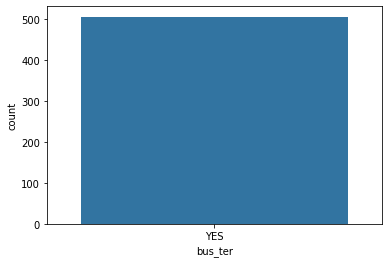

In [11]:
sns.countplot(x = 'bus_ter', data = df)
plt.show()

## Observation
1. Missing value in n_hos_beds
2. Outliers in crime_rate
3. Outliers in n_hot_rooms and rainfall
4. Bus_ter has only 'Yes' values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [13]:
np.percentile(df.n_hot_rooms, [99])

array([15.39952])

In [14]:
np.percentile(df.n_hot_rooms, [99])[0]

15.39952

In [15]:
uv = np.percentile(df.n_hot_rooms, [99]) [0]

In [16]:
df[(df.n_hot_rooms > uv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.4690,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.12,None,38,YES,0.045764
166,50.0,2.01019,49.58,0.6050,7.929,96.2,2.11,1.91,2.31,1.86,25.3,3.70,YES,8.300,15.40,River,37,YES,0.052105
204,50.0,0.02009,32.68,0.4161,8.034,31.9,5.41,4.80,5.28,4.99,25.3,2.88,YES,8.900,15.40,River,51,YES,0.044178
267,50.0,0.57834,33.97,0.5750,8.297,67.0,2.60,2.13,2.43,2.52,27.0,7.44,YES,8.000,15.40,None,42,YES,0.063235
369,50.0,5.66998,48.10,0.6310,6.683,96.8,1.55,1.28,1.65,0.94,19.8,3.73,YES,6.700,15.40,River,58,YES,0.067477
423,13.4,7.05042,48.10,0.6140,6.103,85.1,2.08,1.80,2.34,1.87,19.8,23.29,NO,8.268,81.12,Lake,29,YES,0.063344


In [17]:
df[(df.n_hot_rooms > 3 * uv)] = 3 * uv

In [18]:
np.percentile(df.rainfall, [1]) [0]

20.0

In [19]:
lv = np.percentile(df.rainfall, [1]) [0]

In [20]:
df[(df.rainfall < lv)]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
213,28.1,0.14052,40.59,0.489,6.375,32.3,4.11,3.92,4.18,3.57,21.4,9.38,YES,7.562,10.2248,None,3.0,YES,0.044019


In [21]:
df[(df.rainfall < 0.3 * lv)] = 0.3 * lv

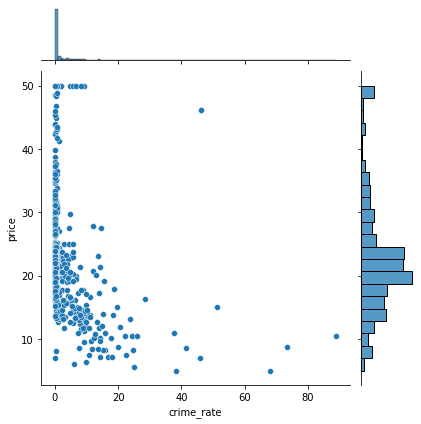

In [22]:
sns.jointplot(x = 'crime_rate', y = 'price', data = df)
plt.show()

In [23]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.572722,3.793719,41.082702,0.746049,6.440235,68.416595,4.144283,3.802326,4.132346,3.792860,21.613631,12.774994,8.050717,12.855700,39.237939,0.248612
std,9.303248,9.004149,7.034086,2.878605,2.603320,28.263278,3.387725,3.405033,3.395625,3.399734,2.749723,7.425069,2.840178,2.703509,12.496573,2.909489
min,5.000000,0.006320,6.000000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,6.000000,1.730000,5.268000,6.000000,6.000000,0.033292
25%,17.025000,0.082268,35.145000,0.449000,5.885500,45.025000,2.270000,1.942500,2.232500,1.942500,19.800000,6.950000,6.628000,11.189800,28.000000,0.046514
50%,21.200000,0.262660,39.690000,0.538000,6.208500,77.150000,3.395000,3.045000,3.380000,3.095000,20.950000,11.395000,8.000000,12.720000,40.000000,0.053630
75%,25.000000,3.695990,48.100000,0.629250,6.628000,94.075000,5.435000,5.037500,5.445000,5.017500,22.925000,17.057500,9.096000,14.170800,50.000000,0.061494
max,50.000000,88.976200,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,60.000000,46.198560


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    float64
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [25]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    float64
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [27]:
df.crime_rate = np.log(1 + df.crime_rate)

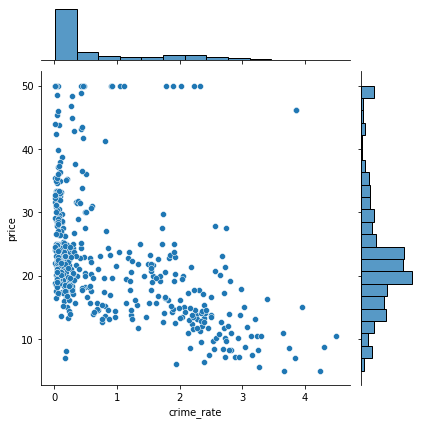

In [28]:
sns.jointplot(x = 'crime_rate', y = 'price', data = df)
plt.show()

In [29]:
df['avg_dist'] = (df.dist1 + df.dist2 + df.dist3 + df.dist4) / 4

In [30]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.572722,0.828063,41.082702,0.746049,6.440235,68.416595,4.144283,3.802326,4.132346,3.792860,21.613631,12.774994,8.050717,12.855700,39.237939,0.248612,3.967954
std,9.303248,1.039027,7.034086,2.878605,2.603320,28.263278,3.387725,3.405033,3.395625,3.399734,2.749723,7.425069,2.817592,2.703509,12.496573,2.909489,3.395047
min,5.000000,0.006300,6.000000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,6.000000,1.730000,5.268000,6.000000,6.000000,0.033292,1.127500
25%,17.025000,0.079058,35.145000,0.449000,5.885500,45.025000,2.270000,1.942500,2.232500,1.942500,19.800000,6.950000,6.641500,11.189800,28.000000,0.046514,2.103125
50%,21.200000,0.233220,39.690000,0.538000,6.208500,77.150000,3.395000,3.045000,3.380000,3.095000,20.950000,11.395000,8.027000,12.720000,40.000000,0.053630,3.216250
75%,25.000000,1.546709,48.100000,0.629250,6.628000,94.075000,5.435000,5.037500,5.445000,5.017500,22.925000,17.057500,9.088000,14.170800,50.000000,0.061494,5.226875
max,50.000000,4.499545,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,60.000000,46.198560,46.198560


In [31]:
del df['dist1']
del df['dist2']
del df['dist3']
del df['dist4']
del df['bus_ter']

In [32]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks,avg_dist
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.572722,0.828063,41.082702,0.746049,6.440235,68.416595,21.613631,12.774994,8.050717,12.855700,39.237939,0.248612,3.967954
std,9.303248,1.039027,7.034086,2.878605,2.603320,28.263278,2.749723,7.425069,2.817592,2.703509,12.496573,2.909489,3.395047
min,5.000000,0.006300,6.000000,0.385000,3.561000,2.900000,6.000000,1.730000,5.268000,6.000000,6.000000,0.033292,1.127500
25%,17.025000,0.079058,35.145000,0.449000,5.885500,45.025000,19.800000,6.950000,6.641500,11.189800,28.000000,0.046514,2.103125
50%,21.200000,0.233220,39.690000,0.538000,6.208500,77.150000,20.950000,11.395000,8.027000,12.720000,40.000000,0.053630,3.216250
75%,25.000000,1.546709,48.100000,0.629250,6.628000,94.075000,22.925000,17.057500,9.088000,14.170800,50.000000,0.061494,5.226875
max,50.000000,4.499545,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,60.000000,46.198560,46.198560


In [33]:
df = pd.get_dummies(df)

In [34]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,...,airport_6.0,airport_46.19856,airport_NO,airport_YES,waterbody_6.0,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
0,24.00000,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,...,0,0,0,1,0,0,0,0,0,1
1,21.60000,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,...,0,0,1,0,0,0,1,0,0,0
2,46.19856,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,...,0,1,0,0,0,1,0,0,0,0
3,33.40000,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,...,0,0,0,1,0,0,1,0,0,0
4,36.20000,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,...,0,0,1,0,0,0,1,0,0,0


In [35]:
del df['airport_NO']
del df['waterbody_None']

In [36]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,...,parks,avg_dist,airport_6.0,airport_46.19856,airport_YES,waterbody_6.0,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.00000,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,...,0.049347,4.08750,0,0,1,0,0,0,0,1
1,21.60000,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,...,0.046146,4.96750,0,0,0,0,0,1,0,0
2,46.19856,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,...,46.198560,46.19856,0,1,0,0,1,0,0,0
3,33.40000,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,...,0.047151,6.06500,0,0,1,0,0,1,0,0
4,36.20000,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,...,0.039474,6.06250,0,0,0,0,0,1,0,0


In [37]:
df.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,...,parks,avg_dist,airport_6.0,airport_46.19856,airport_YES,waterbody_6.0,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
price,1.000000,-0.422527,-0.438254,0.135889,0.338999,-0.368388,0.501262,-0.648314,0.195533,0.143055,...,0.150908,0.273978,-0.079349,0.160133,0.172822,-0.079349,0.160133,0.038570,-0.038916,0.067265
crime_rate,-0.422527,1.000000,0.628175,0.214846,0.100646,0.531227,-0.209088,0.620905,0.152706,0.180176,...,0.189581,-0.210713,0.047923,0.183660,-0.145294,0.047923,0.183660,-0.038097,0.003233,-0.069777
resid_area,-0.438254,0.628175,1.000000,0.056893,-0.057325,0.644261,-0.211118,0.584021,0.048358,0.046378,...,0.028012,-0.397332,-0.222162,0.045861,-0.103699,-0.222162,0.045861,-0.027307,0.053482,-0.090739
air_qual,0.135889,0.214846,0.056893,1.000000,0.955151,-0.028409,0.534238,0.301988,0.846446,0.765458,...,0.999296,0.764200,0.081300,0.995646,-0.076358,0.081300,0.995646,-0.034177,-0.026325,-0.051606
room_num,0.338999,0.100646,-0.057325,0.955151,1.000000,-0.111491,0.619434,0.115236,0.826880,0.746665,...,0.958304,0.789245,-0.007533,0.963008,-0.022019,-0.007533,0.963008,-0.029735,-0.021323,-0.032551
age,-0.368388,0.531227,0.644261,-0.028409,-0.111491,1.000000,-0.207527,0.563422,-0.050586,-0.024060,...,-0.055875,-0.502854,-0.098370,-0.049569,0.016373,-0.098370,-0.049569,0.003215,-0.002071,-0.084030
teachers,0.501262,-0.209088,-0.211118,0.534238,0.619434,-0.207527,1.000000,-0.110889,0.485864,0.446918,...,0.538078,0.547654,-0.252929,0.563779,0.027055,-0.252929,0.563779,0.029526,-0.047161,0.055259
poor_prop,-0.648314,0.620905,0.584021,0.301988,0.115236,0.563422,-0.110889,1.000000,0.210013,0.233993,...,0.280972,-0.072667,-0.040644,0.283845,-0.107780,-0.040644,0.283845,-0.012095,0.013191,-0.117207
n_hos_beds,0.195533,0.152706,0.048358,0.846446,0.826880,-0.050586,0.485864,0.210013,1.000000,0.666593,...,0.847331,0.659842,-0.032420,0.853731,-0.060770,-0.032420,0.853731,-0.003729,0.009261,-0.077814
n_hot_rooms,0.143055,0.180176,0.046378,0.765458,0.746665,-0.024060,0.446918,0.233993,0.666593,1.000000,...,0.764480,0.598427,-0.112956,0.777686,-0.047720,-0.112956,0.777686,-0.022848,0.015924,-0.061420


In [38]:
del df['parks']

In [39]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_6.0,airport_46.19856,airport_YES,waterbody_6.0,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,24.00000,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,23.00000,4.08750,0,0,1,0,0,0,0,1
1,21.60000,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,42.00000,4.96750,0,0,0,0,0,1,0,0
2,46.19856,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,0,1,0,0,1,0,0,0
3,33.40000,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,45.00000,6.06500,0,0,1,0,0,1,0,0
4,36.20000,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,55.00000,6.06250,0,0,0,0,0,1,0,0


In [40]:
import statsmodels.api as sm

In [41]:
X = sm.add_constant(df['room_num'])

In [42]:
lm = sm.OLS(df['price'], X).fit()

In [43]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     65.44
Date:                Tue, 30 May 2023   Prob (F-statistic):           4.50e-15
Time:                        01:56:29   Log-Likelihood:                -1815.2
No. Observations:                 506   AIC:                             3634.
Df Residuals:                     504   BIC:                             3643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.7707      1.040     14.201      0.000      12.727      16.814
room_num       1.2114      0.150      8.090      0.000       0.917       1.506
==============================================================================
Omnibus:                       79.920   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.645
Skew:                           0.967   Prob(JB):                     1.57e-29
Kurtosis:                       4.598   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
y = df['price']

In [46]:
X = df[['room_num']]

In [47]:
lm2 = LinearRegression()

In [48]:
lm2.fit(X, y)

LinearRegression()

In [49]:
print(lm2.intercept_, lm2.coef_)

14.770704175408268 [1.2114491]


In [50]:
help(lm2)

Help on LinearRegression in module sklearn.linear_model._base object:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |   

In [51]:
lm2.predict(X)

array([22.73598202, 22.54941885, 70.73790817, 23.24842499, 23.4289309 ,
       22.5603219 , 22.05393617, 22.24776803, 21.59237406, 22.04424458,
       22.49611509, 22.05030183, 21.90492793, 21.97761488, 22.1556979 ,
       21.83829823, 21.96065459, 22.02728429, 21.38037047, 21.70867318,
       21.51847567, 21.99699806, 22.21142456, 21.8128578 , 21.94732865,
       21.55360769, 21.8128578 , 22.09633689, 22.63906609, 22.85591548,
       21.69171289, 22.12662312, 21.97882633, 21.6771755 , 22.1556979 ,
       21.95823169, 21.84677838, 21.85768142, 21.99820951, 22.760211  ,
       23.27992266, 22.97221459, 22.24413368, 22.29501454, 22.12298877,
       21.65415797, 21.78014868, 22.07574226, 21.31131787, 21.55724204,
       21.99457517, 22.17871543, 22.65844927, 22.03697588, 21.90371648,
       23.55249871, 22.50338379, 23.02794125, 22.2150589 , 21.950963  ,
       21.72563347, 21.99820951, 22.59181957, 22.962523  , 23.37683859,
       22.39071902, 21.78136012, 21.89160199, 21.54755045, 21.90

In [52]:
help(sns.jointplot)

Help on function jointplot in module seaborn.axisgrid:

jointplot(*, x=None, y=None, data=None, kind='scatter', color=None, height=6, ratio=5, space=0.2, dropna=False, xlim=None, ylim=None, marginal_ticks=False, joint_kws=None, marginal_kws=None, hue=None, palette=None, hue_order=None, hue_norm=None, **kwargs)
    Draw a plot of two variables with bivariate and univariate graphs.
    
    This function provides a convenient interface to the :class:`JointGrid`
    class, with several canned plot kinds. This is intended to be a fairly
    lightweight wrapper; if you need more flexibility, you should use
    :class:`JointGrid` directly.
    
    Parameters
    ----------
    x, y : vectors or keys in ``data``
        Variables that specify positions on the x and y axes.
    data : :class:`pandas.DataFrame`, :class:`numpy.ndarray`, mapping, or sequence
        Input data structure. Either a long-form collection of vectors that can be
        assigned to named variables or a wide-form datas

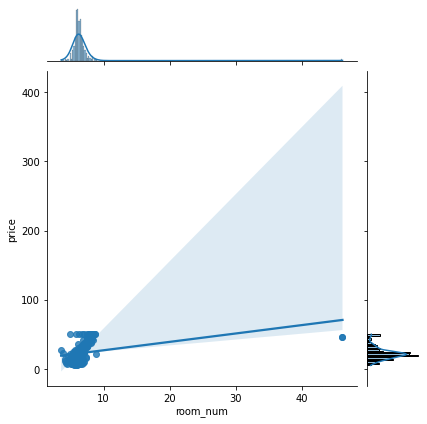

In [53]:
sns.jointplot(x = df['room_num'], y = df['price'], data = df, kind = 'reg')
plt.show()

In [54]:
X_multi = df.drop('price', axis = 1)

In [55]:
X_multi.head()

,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_6.0,airport_46.19856,airport_YES,waterbody_6.0,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,23.00000,4.08750,0,0,1,0,0,0,0,1
1,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,42.00000,4.96750,0,0,0,0,0,1,0,0
2,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,0,1,0,0,1,0,0,0
3,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,45.00000,6.06500,0,0,1,0,0,1,0,0
4,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,55.00000,6.06250,0,0,0,0,0,1,0,0


In [56]:
y_multi = df['price']

In [57]:
y_multi.head()

0    24.00000
1    21.60000
2    46.19856
3    33.40000
4    36.20000
Name: price, dtype: float64

In [58]:
X_multi_cons = sm.add_constant(X_multi)

In [59]:
X_multi_cons.head()

,const,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,avg_dist,airport_6.0,airport_46.19856,airport_YES,waterbody_6.0,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River
0,1.0,0.006300,32.31000,0.53800,6.57500,65.20000,24.70000,4.98000,5.48000,11.19200,23.00000,4.08750,0,0,1,0,0,0,0,1
1,1.0,0.026944,37.07000,0.46900,6.42100,78.90000,22.20000,9.14000,7.33200,12.17280,42.00000,4.96750,0,0,0,0,0,1,0,0
2,1.0,3.854363,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,46.19856,0,1,0,0,1,0,0,0
3,1.0,0.031857,32.18000,0.45800,6.99800,45.80000,21.30000,2.94000,9.26800,11.26720,45.00000,6.06500,0,0,1,0,0,1,0,0
4,1.0,0.066770,32.18000,0.45800,7.14700,54.20000,21.30000,5.33000,8.82400,11.28960,55.00000,6.06250,0,0,0,0,0,1,0,0


In [60]:
lm_multi = sm.OLS(y_multi, X_multi_cons).fit()

In [61]:
lm_multi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     77.17
Date:                Tue, 30 May 2023   Prob (F-statistic):          3.02e-126
Time:                        01:56:30   Log-Likelihood:                -1515.8
No. Observations:                 506   AIC:                             3068.
Df Residuals:                     488   BIC:                             3144.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.1348      5.525     -1.472      0.142     -18.990       2.720
crime_rate                  -0.0037      0.349     -0.011      0.991      -0.690       0.683
resid_area                  -0.0367      0.058     -0.635      0.525      -0.150       0.077
air_qual                   -16.0192      4.007     -3.998      0.000     -23.892      -8.147
room_num                     4.0445      0.428      9.459      0.000       3.204       4.885
age                         -0.0053      0.014     -0.387      0.699      -0.032       0.022
teachers                     1.0087      0.122      8.256      0.000       0.769       1.249
poor_prop                   -0.5738      0.053    -10.856      0.000      -0.678      -0.470
n_hos_beds                   0.3315      0.152      2.177      0.030       0.032       0.631
n_hot_rooms                  0.1881      0.133      1.418      0.157      -0.073       0.449
rainfall                     0.0161      0.018      0.898      0.370      -0.019       0.051
avg_dist                    -1.2125      0.189     -6.405      0.000      -1.585      -0.841
airport_6.0                 43.8471     12.010      3.651      0.000      20.249      67.446
airport_46.19856           310.3407     93.541      3.318      0.001     126.547     494.134
airport_YES                  1.0996      0.456      2.413      0.016       0.204       1.995
waterbody_6.0               43.8471     12.010      3.651      0.000      20.249      67.446
waterbody_46.19856         310.3407     93.541      3.318      0.001     126.547     494.134
waterbody_Lake               0.3308      0.646      0.512      0.609      -0.939       1.600
waterbody_Lake and River    -0.6914      0.716     -0.965      0.335      -2.099       0.716
waterbody_River             -0.2528      0.549     -0.461      0.645      -1.331       0.826
==============================================================================
Omnibus:                      183.113   Durbin-Watson:                   1.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              832.462
Skew:                           1.557   Prob(JB):                    1.71e-181
Kurtosis:                       8.458   Cond. No.                     8.64e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.39e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
lm3 = LinearRegression()

In [63]:
lm3.fit(X_multi, y_multi)

LinearRegression()

In [64]:
print(lm3.intercept_, lm3.coef_)

-8.134798372212774 [-3.74957320e-03 -3.67436451e-02 -1.60192465e+01  4.04450915e+00
 -5.28282620e-03  1.00868331e+00 -5.73800338e-01  3.31501141e-01
  1.88086957e-01  1.61478316e-02 -1.21254169e+00  4.38471071e+01
  3.10340739e+02  1.09957524e+00  4.38471071e+01  3.10340739e+02
  3.30756623e-01 -6.91364653e-01 -2.52822648e-01]


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size = 0.2, random_state = 0)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 19) (102, 19) (404,) (102,)


In [68]:
lm_a = LinearRegression()

In [69]:
lm_a.fit(X_train, y_train)

LinearRegression()

In [70]:
y_test_a = lm_a.predict(X_test)

In [71]:
y_train_a = lm_a.predict(X_train)

In [72]:
from sklearn.metrics import r2_score

In [73]:
r2_score?

In [74]:
r2_score(y_test, y_test_a)

-0.2606399338630263

In [75]:
r2_score(y_train, y_train_a)

0.7630531203539593

In [76]:
from sklearn import preprocessing

In [77]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [78]:
X_train_s = scaler.transform(X_train)

In [79]:
X_test_s = scaler.transform(X_test)

In [80]:
from sklearn.linear_model import Ridge

In [81]:
lm_r = Ridge(alpha = 0.5)
lm_r.fit(X_train_s, y_train)

Ridge(alpha=0.5)

In [82]:
r2_score(y_test, lm_r.predict(X_test_s))

0.5309012162457729

In [83]:
from sklearn.model_selection import validation_curve

In [84]:
validation_curve?

In [85]:
param_range = np.logspace(-2, 8, 100)

In [86]:
param_range

array([1.00000000e-02, 1.26185688e-02, 1.59228279e-02, 2.00923300e-02,
       2.53536449e-02, 3.19926714e-02, 4.03701726e-02, 5.09413801e-02,
       6.42807312e-02, 8.11130831e-02, 1.02353102e-01, 1.29154967e-01,
       1.62975083e-01, 2.05651231e-01, 2.59502421e-01, 3.27454916e-01,
       4.13201240e-01, 5.21400829e-01, 6.57933225e-01, 8.30217568e-01,
       1.04761575e+00, 1.32194115e+00, 1.66810054e+00, 2.10490414e+00,
       2.65608778e+00, 3.35160265e+00, 4.22924287e+00, 5.33669923e+00,
       6.73415066e+00, 8.49753436e+00, 1.07226722e+01, 1.35304777e+01,
       1.70735265e+01, 2.15443469e+01, 2.71858824e+01, 3.43046929e+01,
       4.32876128e+01, 5.46227722e+01, 6.89261210e+01, 8.69749003e+01,
       1.09749877e+02, 1.38488637e+02, 1.74752840e+02, 2.20513074e+02,
       2.78255940e+02, 3.51119173e+02, 4.43062146e+02, 5.59081018e+02,
       7.05480231e+02, 8.90215085e+02, 1.12332403e+03, 1.41747416e+03,
       1.78864953e+03, 2.25701972e+03, 2.84803587e+03, 3.59381366e+03,
      

In [87]:
train_scores, test_scores = validation_curve(
  Ridge(),
  X_train_s, 
  y_train,
  param_name="alpha",
  param_range=param_range,
  scoring = "r2"
)

In [88]:
print(train_scores)
print(test_scores)

[[7.57015722e-01 7.66743902e-01 7.60890117e-01 7.89897704e-01
  7.49952808e-01]
 [7.56936087e-01 7.66684700e-01 7.60835383e-01 7.89843802e-01
  7.49869894e-01]
 [7.56823764e-01 7.66602580e-01 7.60759208e-01 7.89768540e-01
  7.49753569e-01]
 [7.56669244e-01 7.66491749e-01 7.60656011e-01 7.89666203e-01
  7.49594527e-01]
 [7.56462656e-01 7.66346727e-01 7.60520399e-01 7.89531161e-01
  7.49383371e-01]
 [7.56195156e-01 7.66163337e-01 7.60348100e-01 7.89358801e-01
  7.49112056e-01]
 [7.55860734e-01 7.65939824e-01 7.60137033e-01 7.89146623e-01
  7.48775687e-01]
 [7.55458085e-01 7.65677780e-01 7.59888242e-01 7.88895237e-01
  7.48374255e-01]
 [7.54991973e-01 7.65382537e-01 7.59606345e-01 7.88608911e-01
  7.47913761e-01]
 [7.54473521e-01 7.65062791e-01 7.59299262e-01 7.88295382e-01
  7.47406211e-01]
 [7.53919151e-01 7.64729455e-01 7.58977173e-01 7.87964882e-01
  7.46868315e-01]
 [7.53348324e-01 7.64394030e-01 7.58650947e-01 7.87628562e-01
  7.46319125e-01]
 [7.52780668e-01 7.64066890e-01 7.583304

In [89]:
train_mean = np.mean(train_scores, axis = 1)

In [90]:
test_mean = np.mean(test_scores, axis = 1)

In [91]:
train_mean

array([7.64900051e-01, 7.64833973e-01, 7.64741532e-01, 7.64615547e-01,
       7.64448863e-01, 7.64235490e-01, 7.63971980e-01, 7.63658720e-01,
       7.63300705e-01, 7.62907434e-01, 7.62491795e-01, 7.62068197e-01,
       7.61650392e-01, 7.61249527e-01, 7.60872745e-01, 7.60522415e-01,
       7.60195812e-01, 7.59884985e-01, 7.59576556e-01, 7.59251289e-01,
       7.58883435e-01, 7.58440061e-01, 7.57880762e-01, 7.57158301e-01,
       7.56220743e-01, 7.55015343e-01, 7.53493798e-01, 7.51617561e-01,
       7.49361191e-01, 7.46711573e-01, 7.43661782e-01, 7.40199895e-01,
       7.36294611e-01, 7.31880305e-01, 7.26844133e-01, 7.21017654e-01,
       7.14175521e-01, 7.06044013e-01, 6.96321292e-01, 6.84708404e-01,
       6.70945235e-01, 6.54841081e-01, 6.36288281e-01, 6.15252111e-01,
       5.91740375e-01, 5.65767720e-01, 5.37336235e-01, 5.06450311e-01,
       4.73169557e-01, 4.37684085e-01, 4.00381529e-01, 3.61873542e-01,
       3.22963917e-01, 2.84563914e-01, 2.47580416e-01, 2.12809458e-01,
      

In [92]:
test_mean

array([ 7.44885264e-01,  7.44824640e-01,  7.44737983e-01,  7.44618009e-01,
        7.44457496e-01,  7.44250474e-01,  7.43993646e-01,  7.43687706e-01,
        7.43338105e-01,  7.42954898e-01,  7.42551579e-01,  7.42143162e-01,
        7.41743982e-01,  7.41365750e-01,  7.41016159e-01,  7.40698117e-01,
        7.40409390e-01,  7.40142405e-01,  7.39883931e-01,  7.39614512e-01,
        7.39307687e-01,  7.38929266e-01,  7.38437138e-01,  7.37782269e-01,
        7.36911510e-01,  7.35772434e-01,  7.34319661e-01,  7.32521064e-01,
        7.30361434e-01,  7.27841229e-01,  7.24969107e-01,  7.21748772e-01,
        7.18162290e-01,  7.14152791e-01,  7.09609422e-01,  7.04357314e-01,
        6.98155546e-01,  6.90706417e-01,  6.81678244e-01,  6.70740440e-01,
        6.57604043e-01,  6.42055675e-01,  6.23971846e-01,  6.03306317e-01,
        5.80055042e-01,  5.54216081e-01,  5.25768635e-01,  4.94690788e-01,
        4.61019599e-01,  4.24935979e-01,  3.86840644e-01,  3.47385464e-01,
        3.07439718e-01,  

In [93]:
max(test_mean)

0.7448852637884286

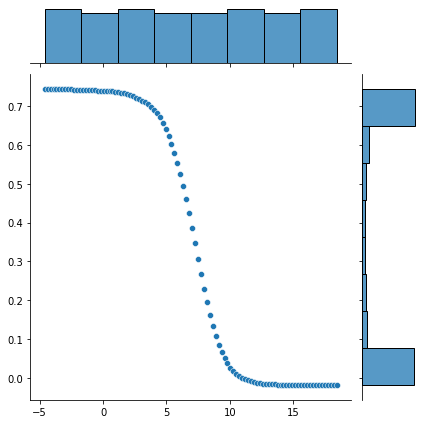

In [94]:
sns.jointplot(x = np.log(param_range), y = test_mean)
plt.show()

In [95]:
np.where(test_mean == max(test_mean))

(array([0], dtype=int64),)

In [96]:
param_range[0]

0.01

In [97]:
lm_r_best = Ridge(alpha = param_range[0])

In [98]:
lm_r_best.fit(X_train_s, y_train)

Ridge(alpha=0.01)

In [99]:
r2_score(y_test, lm_r_best.predict(X_test_s))

-0.07499454378720793

In [100]:
r2_score(y_train, lm_r_best.predict(X_train_s))

0.7629579429880224

In [101]:
from sklearn.linear_model import Lasso

In [102]:
lm_l = Lasso(alpha = 0.4)
lm_l.fit(X_train_s, y_train)

Lasso(alpha=0.4)